In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [222]:
beer_advocate = pd.read_csv('Final/beer_advocate.csv')
rate_beer = pd.read_csv('Final/rate_beer.csv')
print(beer_advocate.shape)
print(rate_beer.shape)

(11043, 18)
(12559, 17)


In [223]:
print(beer_advocate.columns)
print(rate_beer.columns)

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'dates', 'location', 'name'],
      dtype='object')
Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings', 'dates', 'location', 'name'],
      dtype='object')


In [224]:
# take only these colums for the two datasets ['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']
beer_advocate = beer_advocate[['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']]
rate_beer = rate_beer[['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'dates', 'location', 'name']]

In [225]:
print(beer_advocate.head())

   beer_id                    beer_name  brewery_id              brewery_name  \
0     4720             Bitter & Twisted         323  Harviestoun Brewery Ltd.   
1    96705                Ola Dubh 1991         323  Harviestoun Brewery Ltd.   
2    41037  Ola Dubh Special Reserve 12         323  Harviestoun Brewery Ltd.   
3    41012  Ola Dubh Special Reserve 16         323  Harviestoun Brewery Ltd.   
4    47581  Ola Dubh Special Reserve 18         323  Harviestoun Brewery Ltd.   

              style  nbr_ratings   avg  \
0  English Pale Ale          447  3.74   
1           Old Ale          109  4.24   
2           Old Ale          834  4.13   
3           Old Ale          628  4.12   
4           Old Ale          457  4.20   

                                               dates  location  \
0  ['2017-06-04 10:00:00', '2017-05-27 10:00:00',...  Scotland   
1  ['2016-09-10 10:00:00', '2016-08-24 10:00:00',...  Scotland   
2  ['2017-07-24 10:00:00', '2017-07-10 10:00:00',...  Scotland

In [226]:
print(rate_beer.head())

   beer_id                                          beer_name  brewery_id  \
0     4580                              Cave Creek Chili Beer        5973   
1    26757                              Cerveza Mexicali Beer        5973   
2    82330                         Cerveza Mexicali Dark Beer        5973   
3   218798     Dia De Los Muertos Death Becomes You Amber Ale        5973   
4   218799  Dia De Los Muertos Death Rides a Pale Horse Bl...        5973   

                         brewery_name                 style  nbr_ratings  \
0  Cervecería Mexicana (Grupo Modelo)  Spice/Herb/Vegetable          851   
1  Cervecería Mexicana (Grupo Modelo)            Pale Lager          169   
2  Cervecería Mexicana (Grupo Modelo)    Amber Lager/Vienna          106   
3  Cervecería Mexicana (Grupo Modelo)             Amber Ale          175   
4  Cervecería Mexicana (Grupo Modelo)  Golden Ale/Blond Ale          152   

    avg                                              dates location  \
0  1.37  

In [239]:
#merge beer_advocate and rate_beer
final_df = pd.concat([beer_advocate, rate_beer], ignore_index=True)
final_df['dates'] = final_df['dates'].str[1:-1].str.split(', ').apply(lambda x: [i.replace("'", "") for i in x]).values.tolist()

   beer_id                    beer_name  brewery_id              brewery_name  \
0     4720             Bitter & Twisted         323  Harviestoun Brewery Ltd.   
1    96705                Ola Dubh 1991         323  Harviestoun Brewery Ltd.   
2    41037  Ola Dubh Special Reserve 12         323  Harviestoun Brewery Ltd.   
3    41012  Ola Dubh Special Reserve 16         323  Harviestoun Brewery Ltd.   
4    47581  Ola Dubh Special Reserve 18         323  Harviestoun Brewery Ltd.   

              style  nbr_ratings   avg  \
0  English Pale Ale          447  3.74   
1           Old Ale          109  4.24   
2           Old Ale          834  4.13   
3           Old Ale          628  4.12   
4           Old Ale          457  4.20   

                                               dates  location  \
0  [2017-06-04 10:00:00, 2017-05-27 10:00:00, 201...  Scotland   
1  [2016-09-10 10:00:00, 2016-08-24 10:00:00, 201...  Scotland   
2  [2017-07-24 10:00:00, 2017-07-10 10:00:00, 201...  Scotland

## Study the top 10 breweries

We are going to focus on analysis the number of reviews of the first 10 breweries.

In [228]:
#merge the number of ratings per brewery_name
ratings_per_brewery = final_df.groupby('brewery_name')['nbr_ratings'].sum().reset_index()
#take the top 10 breweries with the most ratings without the nbr_ratings column
top_10_ratings_per_brewery = ratings_per_brewery.sort_values(by='nbr_ratings', ascending=False).head(10).drop('nbr_ratings', axis=1)
print(top_10_ratings_per_brewery)

                           brewery_name
939                       Stone Brewing
885           Sierra Nevada Brewing Co.
436            Founders Brewing Company
130  Boston Beer Company (Samuel Adams)
371        Dogfish Head Brewings & Eats
851                          Rogue Ales
87                 Bell's Brewery, Inc.
613           Lagunitas Brewing Company
465               Goose Island Beer Co.
5                  3 Floyds Brewing Co.


In [240]:
#Take only the data from final_df that are in the top 10 breweries
top_10_breweries = final_df[final_df['brewery_name'].isin(top_10_ratings_per_brewery['brewery_name'])]
dates = pd.concat([top_10_breweries['dates']], ignore_index=True)

#put the dates_list element in a single list
dates_list = [item for sublist in dates for item in sublist]

#For each element of the list, take only the day, month and year
dates_list = [i[0:10] for i in dates_list]

#change the type of the dates_list to datetime
dates_list = pd.to_datetime(dates_list)

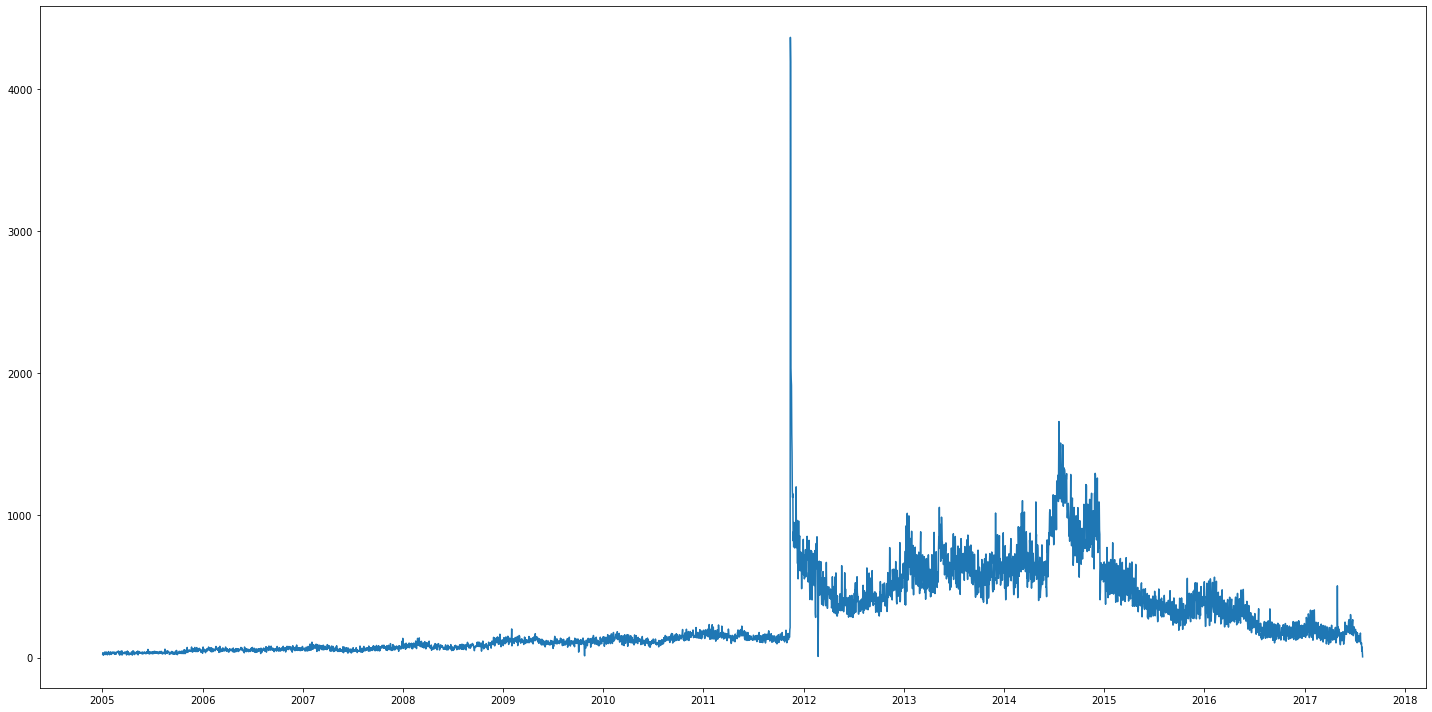

In [241]:
#group the dates by day
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby('dates').size().reset_index(name='counts')

#take only the dates after 2005
dates_count = dates_count[dates_count['dates'] > '2005-01-01']

formatter = mdates.DateFormatter("%Y") # formatter of the date
locator = mdates.YearLocator() # where to put the labels

#plot the number of ratings per day
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
plt.plot(dates_count['dates'], dates_count['counts'])
plt.tight_layout()
plt.show()

We cannot take something from this graph, only that there is a peak in september 2011. Probably due to the merge of an old database.
But, ce can also observe that the quantity of ratings is clearly greater after this peak. Thus, we will focus then for the Euro, and World cup Years (2012,2014,2016)

## Focus on Euro and World cup Year

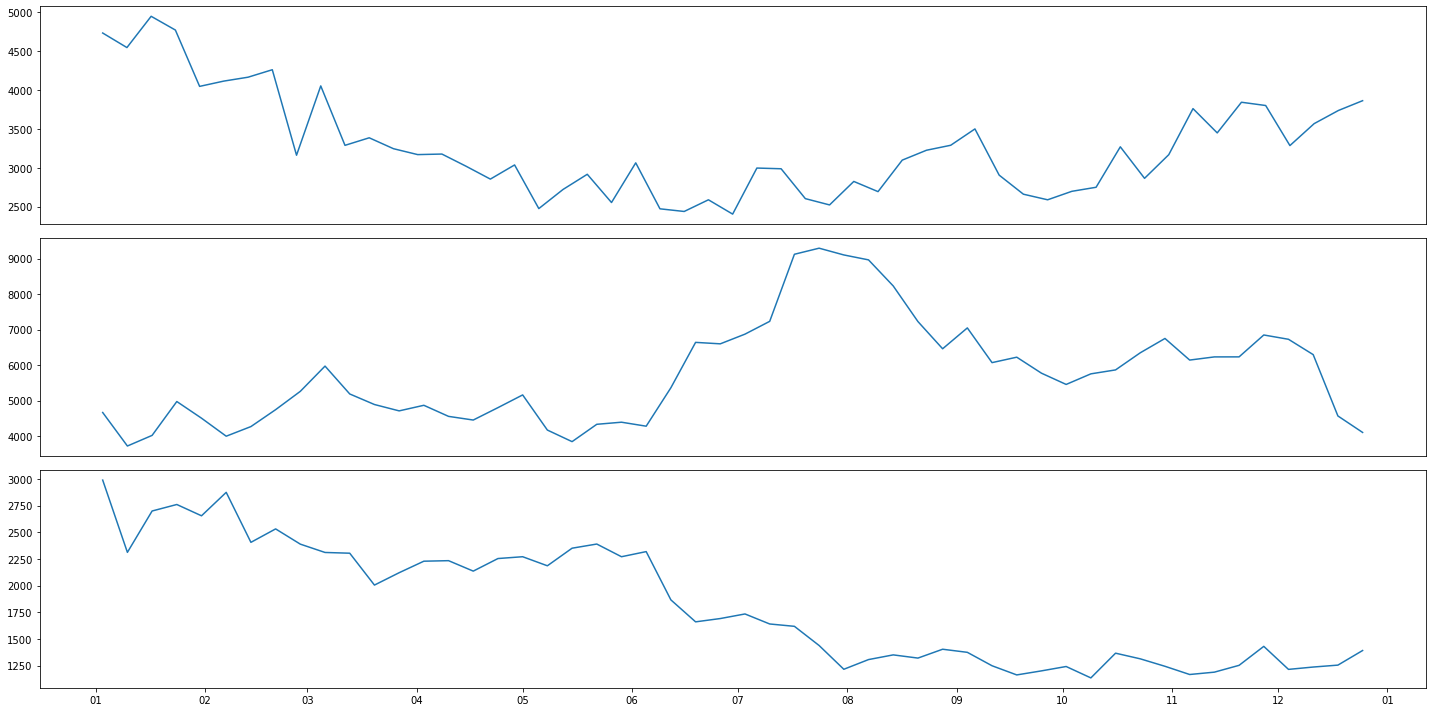

In [231]:
# Take only the data from year 2012, 2014 and 2016 
# take only the year 2012

#round the data every three days 
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby(pd.Grouper(key='dates', freq='W')).size().reset_index(name='counts')

dates_count_2012 = dates_count[(dates_count['dates'] >= '2012-01-01') & (dates_count['dates'] < '2013-01-01')]
dates_count_2014 = dates_count[(dates_count['dates'] >= '2014-01-01') & (dates_count['dates'] < '2015-01-01')]
dates_count_2016 = dates_count[(dates_count['dates'] >= '2016-01-01') & (dates_count['dates'] < '2017-01-01')]

formatter = mdates.DateFormatter("%m") # formatter of the date
locator = mdates.MonthLocator() # where to put the labels

#plot 3 sub histograms for the 3 years

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(locator)
ax1.plot(dates_count_2012['dates'], dates_count_2012['counts'])
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(locator)
ax2.plot(dates_count_2014['dates'], dates_count_2014['counts'])
ax3.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.plot(dates_count_2016['dates'], dates_count_2016['counts'])
plt.tight_layout()
plt.show()

We observe no increase of ratings during euro months but a big increase during World cups ones. Probably because of the nationalities of the reviewers.

## Focus on the top 10 Beers

We are going to focus on analysis the number of reviews of the first 10 breweries.

In [232]:
#merge the number of ratings per brewery_name
ratings_per_beers = final_df.groupby('beer_name')['nbr_ratings'].sum().reset_index()
#take the top 10 breweries with the most ratings without the nbr_ratings column
top_10_ratings_per_beers = ratings_per_beers.sort_values(by='nbr_ratings', ascending=False).head(10).drop('nbr_ratings', axis=1)
print(top_10_ratings_per_beers)

                                     beer_name
7466                  Founders Breakfast Stout
349                              90 Minute IPA
1331                      Arrogant Bastard Ale
15475                          Pliny The Elder
20970                          Two Hearted Ale
18839                     St. Bernardus Abt 12
17565                              Sculpin IPA
9201                              Heady Topper
9991                               Hopslam Ale
7485   Founders KBS (Kentucky Breakfast Stout)


In [242]:
#Take only the data from final_df that are in the top 10 breweries
top_10_beers = final_df[final_df['beer_name'].isin(top_10_ratings_per_beers['beer_name'])]
dates = pd.concat([top_10_beers['dates']], ignore_index=True)

#put the dates_list element in a single list
dates_list = [item for sublist in dates for item in sublist]

#For each element of the list, take only the day, month and year
dates_list = [i[0:10] for i in dates_list]

#change the type of the dates_list to datetime
dates_list = pd.to_datetime(dates_list)

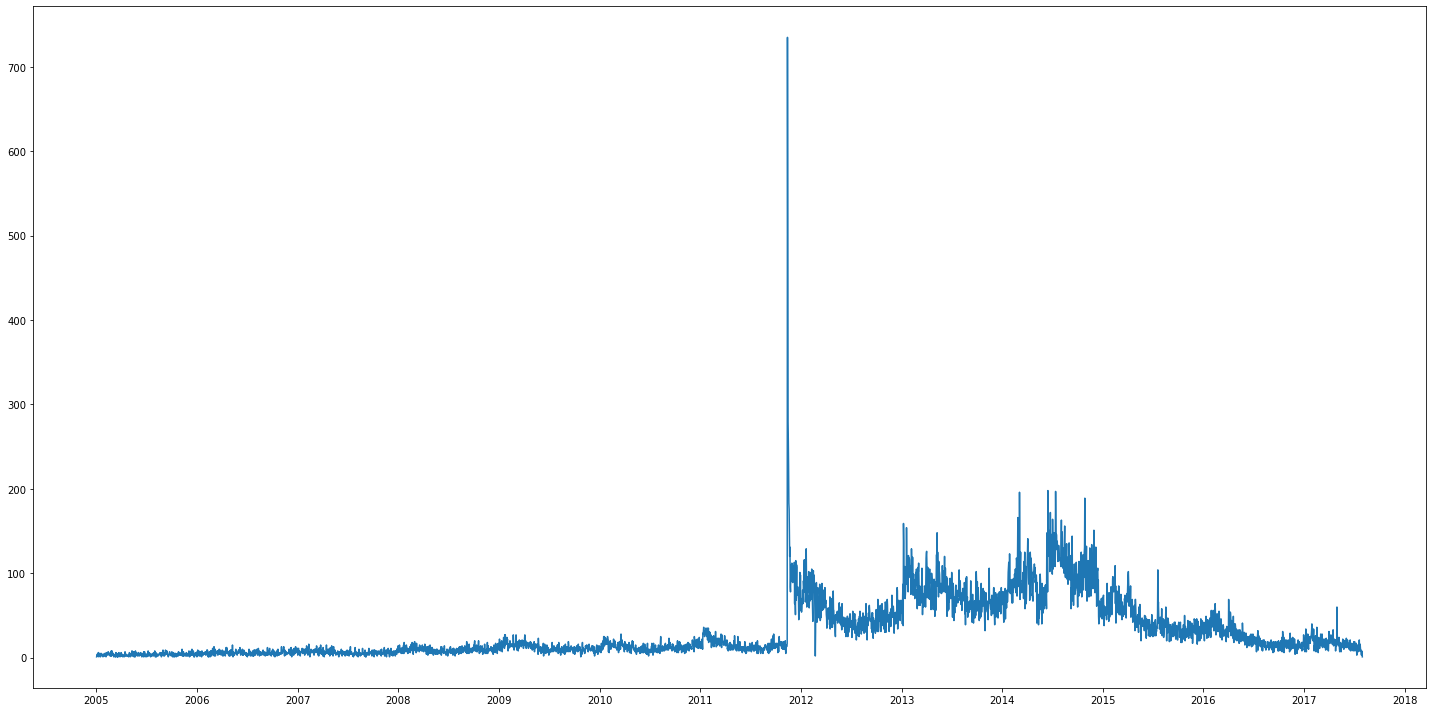

In [243]:
#group the dates by day
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby('dates').size().reset_index(name='counts')

#take only the dates after 2005
dates_count = dates_count[dates_count['dates'] > '2005-01-01']

formatter = mdates.DateFormatter("%Y") # formatter of the date
locator = mdates.YearLocator() # where to put the labels

#plot the number of ratings per day
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
plt.plot(dates_count['dates'], dates_count['counts'])
plt.tight_layout()
plt.show()

## Focus on Euro and World cup Year

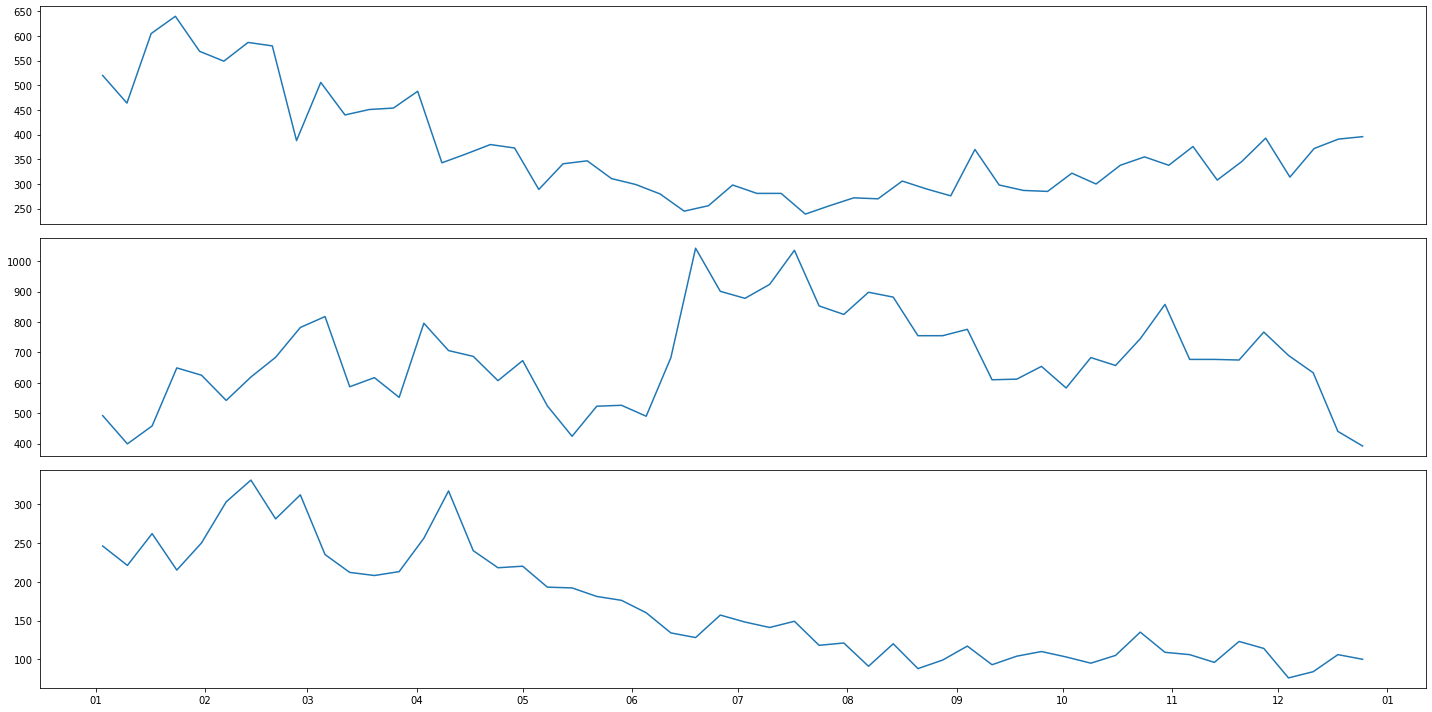

In [235]:
# Take only the data from year 2012, 2014 and 2016 
# take only the year 2012

#round the data every three days 
dates_count = pd.DataFrame(dates_list, columns=['dates']).groupby(pd.Grouper(key='dates', freq='W')).size().reset_index(name='counts')

dates_count_2012 = dates_count[(dates_count['dates'] >= '2012-01-01') & (dates_count['dates'] < '2013-01-01')]
dates_count_2014 = dates_count[(dates_count['dates'] >= '2014-01-01') & (dates_count['dates'] < '2015-01-01')]
dates_count_2016 = dates_count[(dates_count['dates'] >= '2016-01-01') & (dates_count['dates'] < '2017-01-01')]

formatter = mdates.DateFormatter("%m") # formatter of the date
locator = mdates.MonthLocator() # where to put the labels

#plot 3 sub histograms for the 3 years

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(locator)
ax1.plot(dates_count_2012['dates'], dates_count_2012['counts'])
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(locator)
ax2.plot(dates_count_2014['dates'], dates_count_2014['counts'])
ax3.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_locator(locator)
ax3.plot(dates_count_2016['dates'], dates_count_2016['counts'])
plt.tight_layout()
plt.show()

We cannot say more than the analysis of the breweries. We will then focus on the days before, during and after the competition.

- The euro 2012 held from 8 june 2012 to 1st july 2012.
- The world cup 2014 held from 12 june 2014 to 13 july 2014. 
- The euro 2016 held from 10 june 2016 to 10 july 2016.

## Month observation

As a first study I will observe each events separately

### Euro 2012